## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [1]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
prediction_features_path = f"{subdirectory}/prediction_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
prediction_ids_path = f"{subdirectory}/prediction_ids.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
prediction_features = pd.read_pickle(prediction_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
prediction_ids = pd.read_pickle(prediction_ids_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Prediction features dimensions:", prediction_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print()
print("Prediction period info:")
print(f"  From: {prediction_ids['Datum'].min()}")
print(f"  To: {prediction_ids['Datum'].max()}")
print(f"  Total predictions needed: {len(prediction_ids)}")
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (7467, 40)
Loaded Validation features dimensions: (1867, 40)
Loaded Prediction features dimensions: (1877, 40)

Loaded Training labels dimensions: (7467, 1)
Loaded Validation labels dimensions: (1867, 1)

Prediction period info:
  From: 2013-12-25 00:00:00
  To: 2019-07-30 00:00:00
  Total predictions needed: 1877

First few rows of loaded training features:
   KielerWoche_0.0  KielerWoche_1.0  is_holiday_0  is_holiday_1  Bewoelkung  \
0                1                0             1             0         6.0   
1                1                0             1             0         6.0   
2                1                0             1             0         6.0   
3                1                0             1             0         6.0   
4                1                0             1             0         6.0   

   Temperatur  Windgeschwindigkeit  Wettercode  Niederschlag  \
0     17.8375                 15.0        20.0           0.3   

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


2025-12-30 12:49:37.587489: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-30 12:49:37.587905: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-30 12:49:37.638411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-30 12:49:39.252092: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619 (2.42 KB)

 Trainable params: 539 (2.11 KB)

 Non-trainable params: 80 (320.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [3]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64993.7812 - val_loss: 53766.8672
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48297.0195 - val_loss: 19582.2441
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17675.4844 - val_loss: 11227.7305
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13339.1494 - val_loss: 8316.2520
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10143.9746 - val_loss: 6242.4561
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8203.3096 - val_loss: 5481.8169
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7594.2437 - val_loss: 5513.1392
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7377.6123 - val_loss: 5551.1812
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7309.9707 - val_loss: 5611.9429
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7263.1621 - val_loss: 5426.8159
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7089.5078 - val_loss:

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [4]:
model.save("good_weather_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

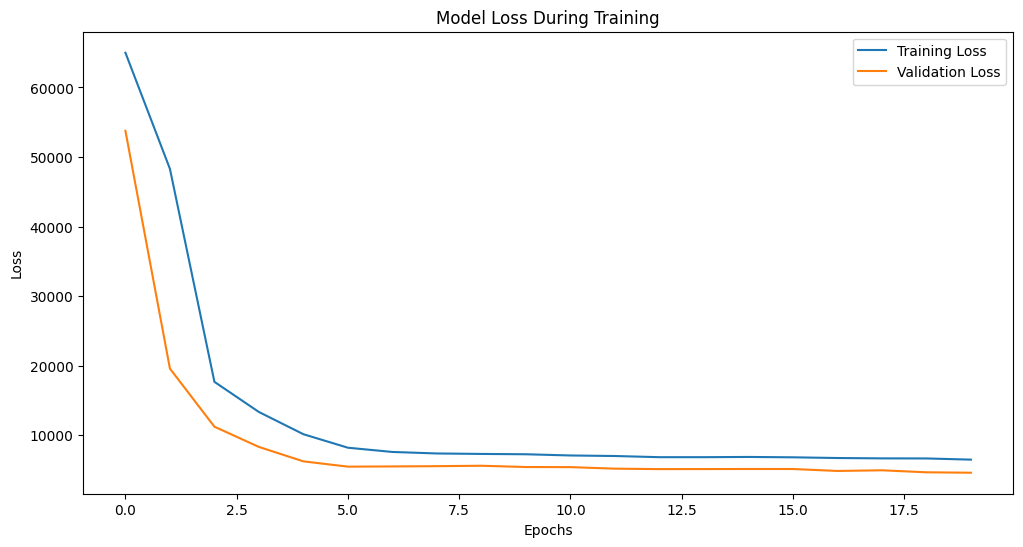

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [6]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAPE on the Training Data: 29.06%
MAPE on the Validation Data: 30.05%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


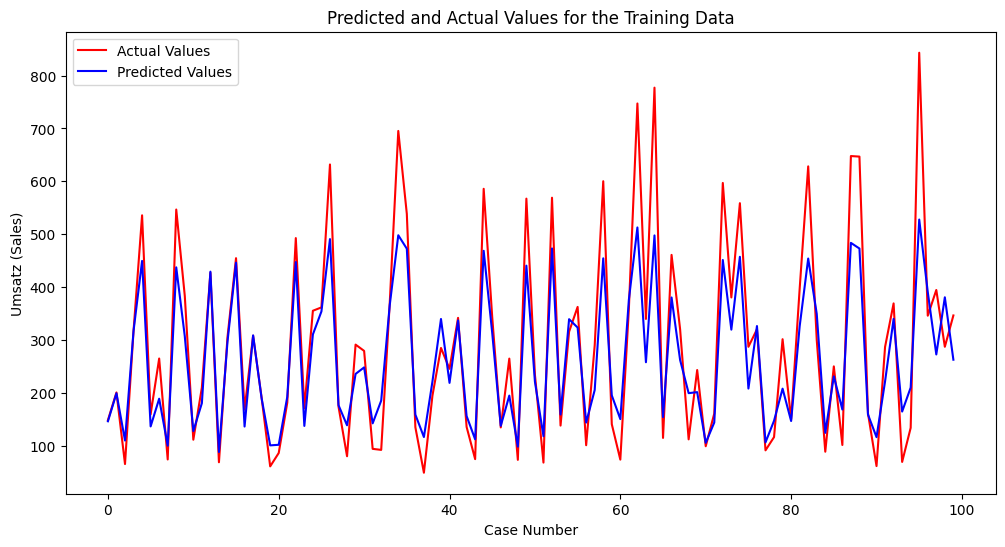

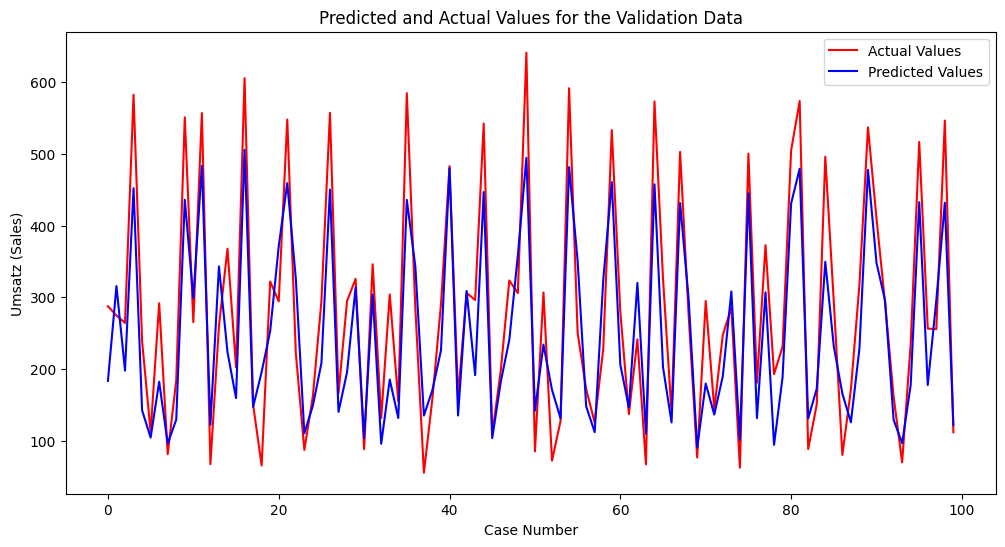

In [7]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Umsatz (Sales)')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

## Making Predictions for Future Period (Aug 2018 - Jul 2019)

Now we'll use the trained model to predict Umsatz for the period from August 1, 2018 to July 30, 2019.


In [8]:
# Make predictions for the future period
future_predictions = model.predict(prediction_features)

# Create a DataFrame with predictions and metadata
predictions_df = pd.DataFrame({
    'id': prediction_ids['id'],
    'Datum': prediction_ids['Datum'],
    'Umsatz_predicted': future_predictions.flatten()
})

# Sort by date
predictions_df = predictions_df.sort_values('Datum').reset_index(drop=True)

print(f"Generated {len(predictions_df)} predictions")
print(f"\nDate range: {predictions_df['Datum'].min()} to {predictions_df['Datum'].max()}")
print(f"\nPredicted Umsatz statistics:")
print(predictions_df['Umsatz_predicted'].describe())

# Display first and last predictions
print("\nFirst 10 predictions:")
print(predictions_df.head(10))
print("\nLast 10 predictions:")
print(predictions_df.tail(10))


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Generated 1877 predictions

Date range: 2013-12-25 00:00:00 to 2019-07-30 00:00:00

Predicted Umsatz statistics:
count    1877.000000
mean      207.395752
std       126.955673
min         0.507447
25%       103.022026
50%       169.623093
75%       303.047119
max       536.517151
Name: Umsatz_predicted, dtype: float64

First 10 predictions:
   id      Datum  Umsatz_predicted
0 NaN 2013-12-25        227.561951
1 NaN 2013-12-26        244.539978
2 NaN 2013-12-28        259.838165
3 NaN 2014-01-01        231.589844
4 NaN 2014-04-18        263.460968
5 NaN 2014-05-01        296.204437
6 NaN 2014-05-03        299.211700
7 NaN 2014-05-04        285.848328
8 NaN 2014-08-17        320.609070
9 NaN 2014-12-25        234.965454

Last 10 predictions:
             id      Datum  Umsatz_predicted
1867  1907292.0 2019-07-29        448.386261
1868  1907295.0 2019-07-29        311.024231
1869  1907293.0 2019-07-29        193.370743
1870  1907294.0 2019-07-29     

## Export Predictions to CSV

Save the predictions to a CSV file for submission or further analysis.


In [9]:
# Export predictions to CSV
output_file = "neural_net_predictions_2018-2019.csv"
predictions_df.to_csv(output_file, index=False)

print(f"Predictions saved to: {output_file}")
print(f"\nFile contains {len(predictions_df)} predictions")
print(f"Columns: {list(predictions_df.columns)}")


Predictions saved to: neural_net_predictions_2018-2019.csv

File contains 1877 predictions
Columns: ['id', 'Datum', 'Umsatz_predicted']
